# 入门

- 简单了解监督学习模型的2类主要模型：回归模型、分类模型
- 简单了解最基本的监督学习模型：单变量线性回归模型
  1. ML常用概念：特征、目标、参数、模型、实际值、预测值、代价函数
  2. 单变量线性模型的最简单模式、代价函数，了解参数的不同值对模型的影响
  3. 求解参数的过程：梯度下降算法

x.len= 20 x= [15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 86, 93, 100, 107, 114, 121, 128, 135, 142, 150]
y.len= 20 y= [8.0, 22.5, 37.0, 46, 62, 105, 141, 125, 117, 132, 136, 91, 104, 52, 72, 187, 186, 194, 185, 174]


/var/folders/6h/bhmdvd9s1rxc40_xhz9g2rww0000gn/T/ipykernel_40816/2016786206.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 4))


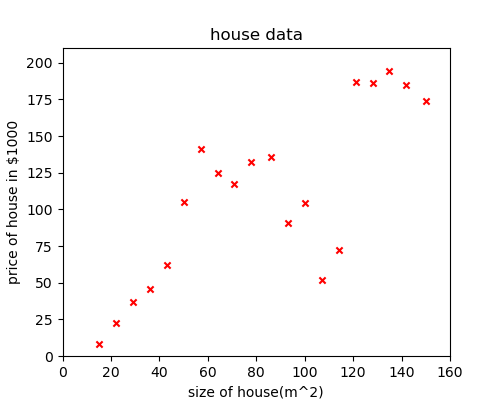

In [78]:
"""
准备：
 1. 训练集数据 T = {(x_i, y_i), i=1,...,m }，由m对特征x和目标y组成。
 2. 特征x可以包含多个维度。
 3. 为方便学习，特征x简化成一维特征，则(x_i, y_i)是第i个训练数据，可看作二维笛卡儿坐标系中的一个点。x为房子面积，y为房价。
"""
%matplotlib widget


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#m个训练数据
m =20
#x、y的具体数据
xmin, xmax, ymin, ymax = 15, 150, 8, 200
np.random.seed(100)
x = np.linspace(xmin, xmax, m, dtype=int).tolist()
y = np.linspace(ymin,ymin+29,3).tolist() +\
np.random.randint(ymin+30, ymax-30, size=m - 8).tolist() +\
np.random.randint(ymax-30, ymax, size=5).tolist()

print("x.len=",len(x), "x=", x)
print("y.len=",len(y), "y=", y)

#绘制训练集点图
def plotTrainingScatters(ax1):
    ax1.set_title("house data")
    ax1.axis([0, xmax+10, 0, ymax+10])
    ax1.set_xlabel("size of house(m^2)")
    ax1.set_ylabel("price of house in $1000")
    ax1.scatter(x, y, s=20, marker="x", c="red")
    
fig = plt.figure(figsize=(5, 4))
ax1 = fig.add_subplot()
plotTrainingScatters(ax1)

/var/folders/6h/bhmdvd9s1rxc40_xhz9g2rww0000gn/T/ipykernel_40816/366987069.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (axleft, axright) = plt.subplots(1, 2, figsize=(10, 4))


interactive(children=(FloatSlider(value=1.2, description='w', max=1.35, min=1.2, step=0.01), Output()), _dom_c…

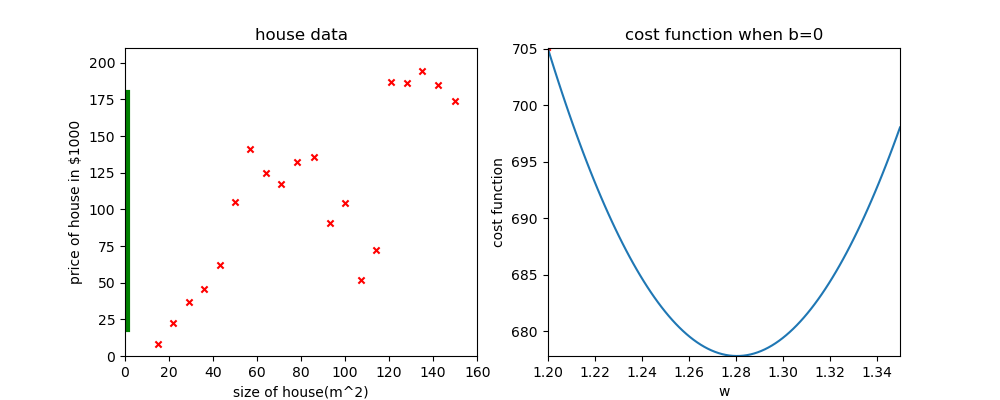

In [83]:
"""
最简单的单变量线性回归模型: f(x) = wx + b，w和b是模型参数，
通过训练集数据的训练，最小化模型的预测值f(x)与真实值y之间的差距，可以得到参数值w、b。
衡量模型预测值与真实值之间的差距往往需建立代价函数cost function，最常用的算法是“差平方和的平均值”，即：
 j(w, b) = sum((f(x_i)-y_i)^2)/m 
 其中，f(x_i) - y_i 表示单个模型预测值与真实值之间的差距，用其绝对值或平方均可，避免差距被正负符号影响，累加所有差距，所得和可能很大，
 可求平均值避免和超过其类型的范围上限。在实际计算中，为方便计算，j(w, b) = sum((f(x_i)-y_i)^2)/2m。
 对于单变量线性回归模型而言，差平方和是个碗形状的，只有一个全局最小值。
 
为了解模型参数的不同值，对代价函数的影响，先简化b=0, 对参数w取不同值。
"""
x, y = np.array(x), np.array(y)
b = 0
#model = w * x + b

jlist = []
wmin, wmax = 1.2,1.35
wlist = np.linspace(wmin, wmax, 100)
for w in wlist:
    j = ((w * x - y) ** 2).sum() / 2 / m
    jlist.append(j)

#绘制训练集点图和简化后的代价函数线图
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

plt.close()

fig, (axleft, axright) = plt.subplots(1, 2, figsize=(10, 4))
plotTrainingScatters(axleft)
line, = axleft.plot([], [], "g-", linewidth=3)

axright.set_title("cost function when b=0")
axright.set_xlabel("w")
axright.set_ylabel("cost function")
jlist = np.array(jlist)
axright.axis([wmin, wmax, jlist.min(), jlist.max()])
axright.plot(wlist, jlist)
scat = axright.scatter(0, 0, s=10, c="red", marker="x")

def update_model(w):
    model = w * x + b
    line.set_xdata(w)
    line.set_ydata(model)
    j = ((w * x - y) ** 2).sum() / 2 / m
    scat.set_offsets([w, j])
    
sliders = interactive(update_model,
                      w = widgets.FloatSlider(min=wmin, max=wmax, value=1, step=0.01))
display(sliders)

plt.show()
#从图看出，b=0时，w的取值变动，代价函数的值不同。但距离更准确的模型还很遥远。
    

# 代价函数求解：梯度下降

为求解模型的参数，目标是最小化模型与真实值之间的总差距，即代价函数值最小。
用梯度下降算法求解。

梯度下降的步骤：
1. 有一个起始点
2. 点的360度方向评估哪个方向的下降速度最快，向那个方向走1步
3. 到新点
4. 重复2和3，直到最低点

由于梯度下降的结果最低点跟起始点有关系，所以，只能得到局部极小值，对于有多局部个极小值的函数而言，一次梯度下降不一定能得到全局最小值。
幸而，差平方和代价函数是个碗形，只有一个最小值，因而可以用梯度下降算法求得。

 - 下降速度最快的方向可求导得到。
 - 每次选好方向后走的步长可以固定为step，也就是学习速率，取值范围(0,1)。步长太小，则下降速度慢，步长太大，则可能跨越过极小值点，产生岔路。
   固定步长也能走到极小值点的原因是：沿着下降方向的坡度是越来越平缓的，意味着每次下降一步都会比上一步更小，因而，能逐渐靠近极小值点。



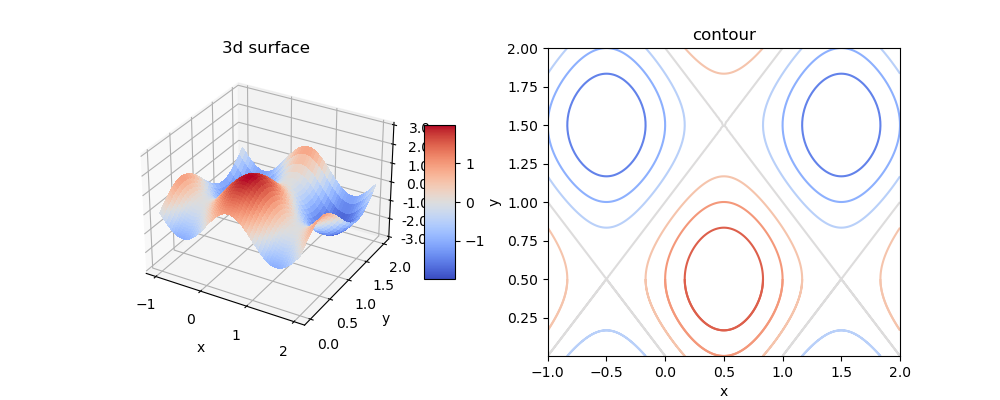

In [104]:
#梯度下降算法的3D表面图和等值线图

plt.close()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1, projection="3d")
ax.set_title("3d surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

testx = np.linspace(-1, 2, 200)
testy = testx ** 2 / 2
testX, testY = np.meshgrid(testx, testy)
testZ = np.sin(testX * np.pi) + np.sin(testY * np.pi)
surf = ax.plot_surface(testX, testY, testZ, antialiased=False, 
                           linewidth=3, cmap=mpl.cm.coolwarm)
ax.set_zlim(-3, 3)
ax.zaxis.set_major_formatter("{x:0.1f}")
fig.colorbar(surf, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("contour")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(testX, testY, testZ, cmap=mpl.cm.coolwarm)



In [167]:
#梯度下降算法: 下降方向是对参数求导
#w参数的下降方向：derivate_j_by_w = sum(f(x_i)-y_i) * x_i) / m
#b参数的下降方向：derivate_j_by_b = sum(f(x_i)-y_i)/m
w0 = 0
b0 = 0
step = 2 * 1e-4
theta = 4

pw, pb, pj = [], [], []
cnt = 0
w, b = w0, b0
derivate_w = 1
derivate_b = 1
while True:
    cnt += 1
    derivate_w = ((x * w + b - y) * x).sum() / m
    derivate_b = (x * w + b - y).sum() / m
    
    derivate = np.sqrt(derivate_w ** 2 + derivate_b ** 2)
    
    w = w - derivate_w * step
    b = b - derivate_b * step    
    j = ((w * x + b - y) ** 2).sum() / 2 / m
    pw.append(w)
    pb.append(b)
    pj.append(j)
    print(f"第{cnt}次，derivate={derivate},d_w={derivate_w}, d_b={derivate_b}, j={j}, w={w}, b={b}") 
    
    # 终止条件是什么？j为啥有负数？ step大一点derivate就越来越大，为啥？ 
    if derivate < theta:
        break
   
#算了约9w步才到derivate < 0.1的地步，实际上前25步就到了derivate < 4的地步
print(f"计算{cnt}次到最小值，derivate={derivate}, d_w={derivate_w}, d_b={derivate_b}， j={j}")
    


第1次，derivate=10761.850239184012,d_w=-10761.3, d_b=-108.825, j=3871.843554699968, w=2.15226, b=0.021765000000000003
第2次，derivate=7327.208709531156,d_w=7326.895115249999, d_b=67.789698, j=2158.390297111362, w=0.6868809769500002, b=0.008207060400000002
第3次，derivate=4988.732480469336,d_w=-4988.456664943702, d_b=-52.45820878085249, j=1364.1054787862379, w=1.6845723099387406, b=0.018698702156170498
第4次，derivate=3396.580759887788,d_w=3396.4534064666236, d_b=29.412856732629848, j=995.9076557353947, w=1.0052816286454158, b=0.012816130809644527
第5次，derivate=2312.564417523158,d_w=-2312.4145342267484, d_b=-26.32882623883399, j=825.2254564221452, w=1.4677645354907656, b=0.018081896057411326
第6次，derivate=1574.5124074282785,d_w=1574.4695053413852, d_b=11.623162033074731, j=746.103013873508, w=1.1528706344224884, b=0.01575726365079638
第7次，derivate=1072.010650202602,d_w=-1071.9163836797927, d_b=-14.216207181984037, j=709.4237406948288, w=1.367253911158447, b=0.018600505087193187
第8次，derivate=729.883862

w=1.28, b=0.03


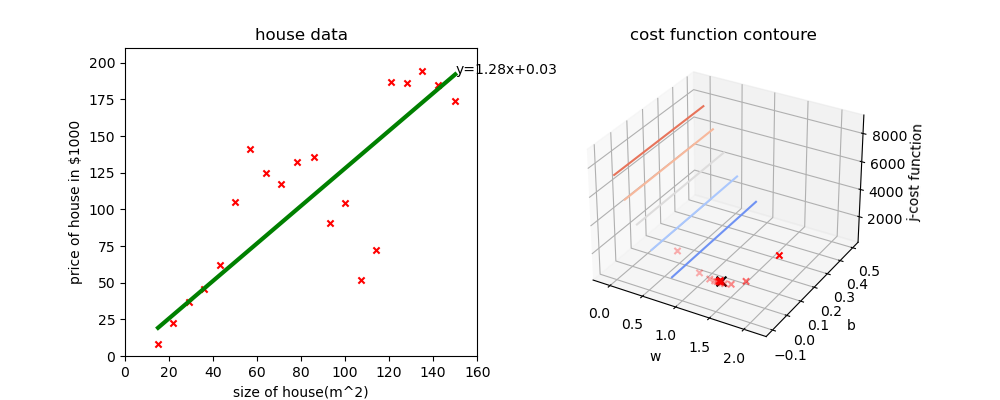

In [174]:
print(f"w={w}, b={b}")

plt.close()

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,2,1)
plotTrainingScatters(ax1)

w = round(w, 2)
b = round(b, 2)
f_x = w * x + b
ax1.plot(x, f_x, "g-", linewidth=3)
ax1.annotate(f"y={w}x+{b}", (x[-1], f_x[-1]))

ax2 = fig.add_subplot(1,2,2,projection="3d")
ax2.set_title("cost function contoure")
ax2.set_xlabel("w")
ax2.set_ylabel("b")
ax2.set_zlabel("j-cost function")

wlist = np.linspace(-0.1, 1.5, 1000)
blist = np.linspace(-0.1, 0.5, 1000)
W, B = np.meshgrid(wlist, blist)
J = W * 0
for x_i, y_i in zip(x, y):
    J += (W * x_i + B - y_i) ** 2
J = J / 2 / m
ax2.contour(W, B, J, cmap=mpl.cm.coolwarm)

ax2.scatter(pw, pb, pj, marker="x", c="red", s=20)
ax2.scatter(pw[-1], pb[-1], pj[-1], marker="x", c="black", s=50)

In [ ]:
#以上数据集，w和b的微小变动，导致j变动从大幅度到小幅度，因而，图像很难看清楚细节，需要缩放到更小范围坐标轴才好看清楚